Centroid Cluster 1: [-1.14626147 -0.55970301]
Centroid Cluster 2: [1.4289973  0.47245093]
Centroid Cluster 3: [-0.36196371  1.11658397]
Centroid Cluster 4: [ 0.46382939 -1.50126913]
Cluster dengan centroid (-1.1462614715333053, -0.5597030099830441):
[array([-1.67929121, -0.806722  ]), array([-1.64628627, -0.60001155]), array([-1.48126158, -0.68269573]), array([-1.51426652, -0.31061691]), array([-1.38224677, -0.88940619]), array([-1.38224677, -0.47598528]), array([-1.41525171, -0.08323541]), array([-1.3162369, -0.351959 ]), array([-1.21722209, -0.64135364]), array([-1.18421715, -0.55866946]), array([-1.08520234, -0.37263005]), array([-0.92017765, -0.41397214]), array([-0.88717271, -0.33128796]), array([-1.01919246, -0.70336678]), array([-0.92017765, -0.76537991]), array([-0.88717271, -0.66202469]), array([-0.82116284, -0.82739305]), array([-0.7881579 , -0.66202469]), array([-0.75515296, -0.64135364]), array([-0.62313322, -0.41397214])]
Cluster dengan centroid (1.4289972959593735, 0.4724

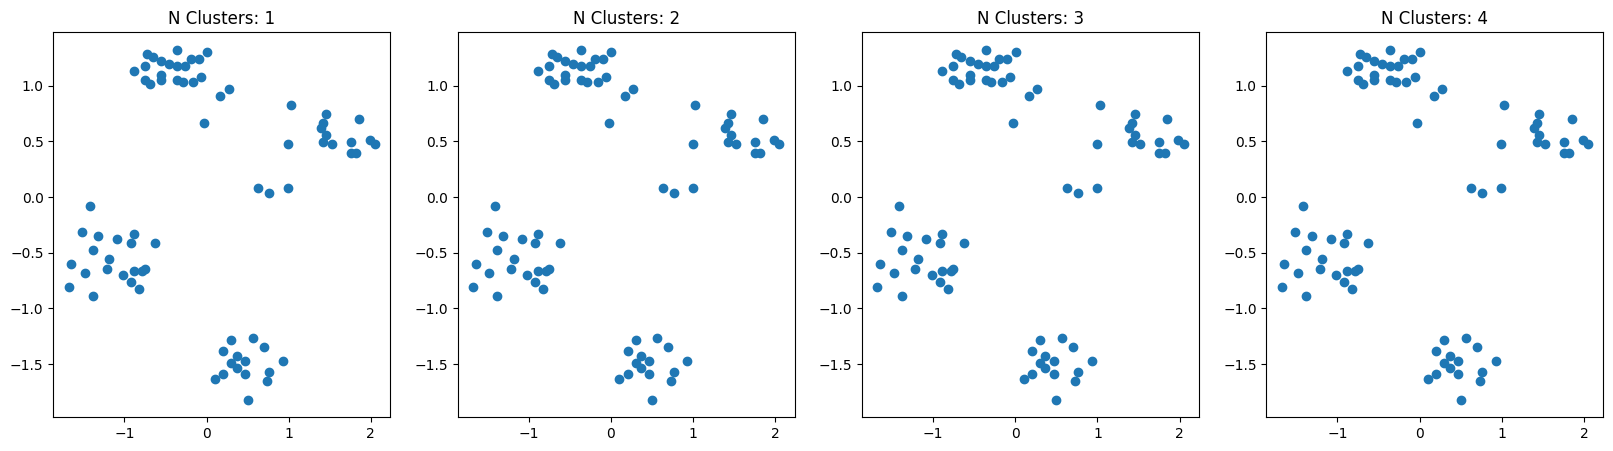

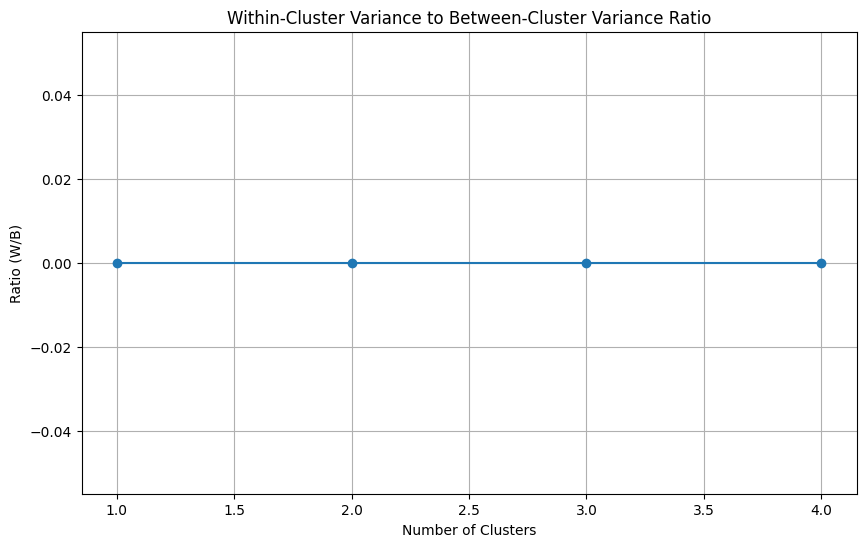

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random

# Fungsi untuk menghitung jarak antara dua titik
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Fungsi untuk menginisialisasi centroid secara acak
def initialize_centroids(data, k):
    centroids = random.sample(list(data), k)
    return centroids

# Fungsi untuk mengelompokkan data ke dalam cluster
def assign_to_clusters(data, centroids):
    clusters = {}
    for point in data:
        closest_centroid = min(centroids, key=lambda centroid: euclidean_distance(point, centroid))
        if closest_centroid in clusters:
            clusters[closest_centroid].append(point)
        else:
            clusters[closest_centroid] = [point]
    return clusters

# Fungsi untuk menghitung centroid baru untuk setiap cluster
def update_centroids(clusters):
    new_centroids = []
    for centroid, cluster_points in clusters.items():
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return new_centroids

# Fungsi untuk menentukan apakah konvergensi telah tercapai
def has_converged(old_centroids, new_centroids, tolerance=1e-4):
    return all(euclidean_distance(old, new) < tolerance for old, new in zip(old_centroids, new_centroids))

# Fungsi K-Means
def k_means(data, k):
    centroids = initialize_centroids(data, k)
    while True:
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if has_converged(centroids, new_centroids):
            return clusters, centroids
        centroids = new_centroids

# Fungsi untuk mengelompokkan data ke dalam cluster
def assign_to_clusters(data, centroids):
    clusters = {}
    for point in data:
        closest_centroid = min(centroids, key=lambda centroid: euclidean_distance(point, centroid))
        # Konversi centroid menjadi tuple
        closest_centroid_tuple = tuple(closest_centroid)
        if closest_centroid_tuple in clusters:
            clusters[closest_centroid_tuple].append(point)
        else:
            clusters[closest_centroid_tuple] = [point]
    return clusters

dataset = pd.read_csv("C:/Users/bayuk/OneDrive/Documents/AI/pens/smtr3/Machine Learning/Data/ruspini.csv")
dataset = dataset.fillna(dataset.groupby("CLASS").transform("mean"))

# Memilih atribut yang akan digunakan
selected_features = ['X','Y']

# Memisahkan fitur dan target
X = dataset[selected_features]
y = dataset['CLASS']

# Melakukan normalisasi data
scaler = StandardScaler()
data_norm = scaler.fit_transform(X)

# Membuat dataframe pandas dari data ternormalisasi
df = pd.DataFrame(data_norm, columns=['X', 'Y'])  # Sesuaikan jumlah kolom dengan data Anda
df['CLASS'] = y

data = df.loc[:,['X','Y']]

# Contoh penggunaan K-Means
if __name__ == '__main__':
    # Data
    data = np.array(data)

    # Jumlah cluster
    k = 4  # jumlah cluster 

    # Centroid yang telah diinisialisasi (random)
    centroids = random.sample(list(data), k)

    # Memanggil fungsi assign_to_clusters
    clusters = assign_to_clusters(data, centroids)

    # Menjalankan K-Means
    clusters, final_centroids = k_means(data, k)

    # Menampilkan hasil clustering
    for i, centroid in enumerate(final_centroids, start=1):
        print(f"Centroid Cluster {i}: {centroid}")
    for centroid, cluster_points in clusters.items():
        print(f'Cluster dengan centroid {centroid}:')
        print(cluster_points)

    print('Final Centroids:')
    print(final_centroids)

    satu = "X"
    dua = "Y"

    fig, axs = plt.subplots(nrows=1,ncols=k,figsize=(20,5))     
    for i, ax in enumerate(fig.axes,start=1):
        ax.scatter(x=df[satu], y=df[dua])
        ax.set_title(f'N Clusters: {i}')    

# Menghitung error, variance between, dan variance within
errors = []
variance_between = []
variance_within = []

for k_test in range(1, 5):  # Menguji dari 1 hingga 4 cluster
    kmeans = k_means(data, k_test)
    clusters, final_centroids = k_means(data, k_test)

    # Mendapatkan centroid akhir dan label cluster
    cluster_centers = final_centroids
    labels = []

    for point in data:
        closest_centroid = min(cluster_centers, key=lambda centroid: euclidean_distance(point, centroid))
        label = np.where(cluster_centers == closest_centroid)[0][0]
        labels.append(label)

    error = 0
    variance_within_clusters = []  # Menyimpan variance within setiap cluster

    for i in range(k_test):
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            variance_within_cluster = np.var(cluster_points, axis=0, ddof=1).sum()  # ddof=1 untuk menghitung variance dengan benar
            variance_within_clusters.append(variance_within_cluster)
        else:
            variance_within_clusters.append(0.0)  # Cluster dengan 1 titik memiliki variance 0

    error = sum(variance_within_clusters)  # Total variance within adalah jumlah variance dalam setiap cluster

    # Menghitung variance between clusters
    global_center = data.mean(axis=0)
    squared_distances = [np.linalg.norm(cluster_centers[i] - global_center) ** 2 for i in range(k_test)]
    variance_between_clusters = sum(squared_distances)

    errors.append(error)
    variance_between.append(variance_between_clusters)
    variance_within.append(error)

# Print the errors, variance between, and variance within
print("Number of Clusters  |  Variance Between  |  Variance Within")
for i in range(4):
    print(f"         {i+1:2d}        |  {variance_between[i]:15.2f} | {variance_within[i]:14.2f}")

# Hitung rasio within-cluster variance dibagi between-cluster variance
ratios = [variance_within[i] / variance_between[i] for i in range(4)]

# Jumlah cluster
cluster_numbers = list(range(1, 5))

# Visualisasi rasio
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, ratios, marker='o', linestyle='-')
plt.title('Within-Cluster Variance to Between-Cluster Variance Ratio')
plt.xlabel('Number of Clusters')
plt.ylabel('Ratio (W/B)')
plt.grid(True)
plt.show()